<a href="https://colab.research.google.com/github/dancher00/HPPL/blob/main/(Eng)HPPL2025_concurrent_futures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

concurrent.futures
======

The concurrent.futures module provides a high-level interface for asynchronously executing callables.

The asynchronous execution can be performed with threads, using ThreadPoolExecutor, or separate processes, using ProcessPoolExecutor. Both implement the same interface, which is defined by the abstract Executor class.

https://stackoverflow.com/questions/20776189/concurrent-futures-vs-multiprocessing-in-python-3


https://docs.python.org/3/library/concurrent.futures.html

In [ ]:
# serial version
import time

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)

work(1)
work(2)

end = time.perf_counter()

print(f"Elapsed time: {(end-start)*1000} ms")


Sleeping for 1 seconds
Sleeping for 2 seconds
Elapsed time: 3007.270005999999 ms


In [ ]:
# multiprocessing version
import time
import multiprocessing as mp

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)

processes = []
for s in range(1,6):
    p = mp.Process(target=work, args=(s,))
    p.start()
    processes.append(p)

for p in processes:
    p.join()

end = time.perf_counter()

print(f"Elapsed time: {(end-start)*1000} ms")

Sleeping for 1 seconds
Sleeping for 2 seconds
Sleeping for 3 seconds
Sleeping for 4 seconds
Sleeping for 5 seconds
Elapsed time: 5113.025144000005 ms


In [ ]:
# multiprocessing pool version
import time
import multiprocessing as mp

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)
    return sec

pool = mp.Pool(processes=6)

with pool:
    for s in range(1,6):
        result = pool.apply_async(work,(s,))
        print(result.get(timeout=6))

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

Sleeping for 1 seconds
Sleeping for 2 seconds
1
Sleeping for 3 seconds
2
Sleeping for 4 seconds
3
Sleeping for 5 seconds
4
5
Elapsed time: 15156.672517000005 ms


In [ ]:
import concurrent.futures

import time
import multiprocessing as mp

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)

    #subprocess.run('mycode.exe 5')
    return sec

with concurrent.futures.ProcessPoolExecutor(max_workers=5) as executor:
    results = [executor.submit(work, s) for s in range(1,6)]

    for f in concurrent.futures.as_completed(results):
        print(f.result())

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

Sleeping for 2 secondsSleeping for 1 seconds
Sleeping for 3 seconds

Sleeping for 5 secondsSleeping for 4 seconds

1
2
3
4
5
Elapsed time: 5102.6203659999965 ms


Same interface for threading
========



In [ ]:
import concurrent.futures

import time

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)
    return sec

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(work, s) for s in range(1,6)]

    for f in concurrent.futures.as_completed(results):
        print(f.result())

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

Sleeping for 1 seconds
Sleeping for 2 secondsSleeping for 3 seconds
Sleeping for 4 seconds
Sleeping for 5 seconds

1
2
3
4
5
Elapsed time: 5015.066155999989 ms


In [ ]:
import concurrent.futures

import time

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)
    return sec

with concurrent.futures.ProcessPoolExecutor() as executor:
    secs = [0, 1, 2, 3, 4]
    results = executor.map(work, secs)


    for result in results:
        print(result)

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

Multithreading works well for I/O, but poorly for computation because Global Interpreter Lock (GIL).

GIL tied to garbage collector, which counts references to objects, so it is quite difficult to remove.

There are projects for "reset" GIL (https://github.com/colesbury/nogil)


In [ ]:
import concurrent.futures

import time

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)
    return sec

with concurrent.futures.ThreadPoolExecutor() as executor:
    secs = [0, 1, 2, 3, 4]
    results = executor.map(work, secs)


    for result in results:
        print(result)

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

In [ ]:
%%time

from time import sleep
from concurrent.futures import ProcessPoolExecutor as Executor
import concurrent.futures
from math import sqrt

def work(sec):
    for i in range(10**7):
        a = sqrt(i)

    return a

pool = Executor(max_workers=2)
with pool:
    results = [pool.submit(work, s) for s in range(6)]
    for f in concurrent.futures.as_completed(results):
        print(f.result())

3162.2775020544923
3162.2775020544923
3162.2775020544923
3162.2775020544923
3162.2775020544923
3162.2775020544923
CPU times: user 3.81 s, sys: 16.9 ms, total: 3.83 s
Wall time: 4 s


Text(0, 0.5, 'speedup')

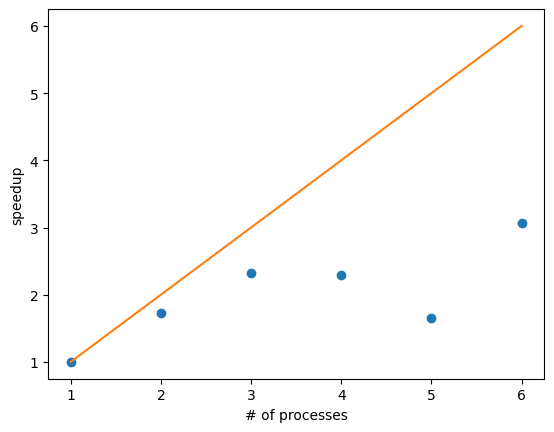

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

times = np.array([6.12, 3.54, 2.64, 2.67, 3.7, 2])
nprocs = np.array([x+1 for x in range(6)])

speed_up = times[0] / times

plt.plot(nprocs, speed_up, 'o')
plt.plot(nprocs, nprocs)
plt.xlabel('# of processes')
plt.ylabel('speedup')
# 13 3.86 3.95

In [ ]:
%%time

for i in range(10**7):
    a = sqrt(i)

CPU times: user 1.53 s, sys: 32.1 ms, total: 1.56 s
Wall time: 1.59 s


In [ ]:
5.07/3.188

1.5903387703889587

In [ ]:
import threading

import time

start = time.perf_counter()

def work(sec):
    print(f"Sleeping for {sec} seconds")
    time.sleep(sec)
    return sec

t1 = threading.Thread(target=work,args=(1,))
t2 = threading.Thread(target=work,args=(1,))

t1.start()
t2.start()

t1.join()
t2.join()

end = time.perf_counter()
print(f"Elapsed time: {(end-start)*1000} ms")

In [ ]:
!which python

/usr/local/bin/python


An example of using it to "spill" problems
=====


In [ ]:
%%writefile runner.py
#!/usr/local/bin/python
from time import sleep
import sys
import numpy as np

n = len(sys.argv)

# if n<2 ...
# Usage: ...

time_to_sleep = int(sys.argv[1])
number = int(sys.argv[2])

sleep(time_to_sleep)

array = np.arange(number)
array = array**2

np.savetxt('result.txt', array)
print("Done")


Overwriting runner.py


In [ ]:
!chmod +x runner.py

In [ ]:
!./runner.py 1 4

Done


In [ ]:
!cat result.txt

0.000000000000000000e+00
1.000000000000000000e+00
4.000000000000000000e+00
9.000000000000000000e+00


In [ ]:
%%writefile wrapper_run.py

import os
import subprocess
import shutil
from concurrent.futures import ProcessPoolExecutor as Pool

global_path_to_bin = '.'

def run(time_to_sleep=1, number=10):
    full_path = os.path.join('.', str(number))
    #print(full_path)

    if not os.path.exists(full_path):
        os.makedirs(full_path)

    #print(os.path.join(full_path, 'runner.py'))

    shutil.copy(os.path.join(global_path_to_bin, 'runner.py'), full_path)
    #subprocess.call([os.path.join(full_path, f'runner.py {time_to_sleep} {number}')], cwd=full_path)
    #subprocess.run([os.path.join(full_path, 'runner.py'), str(time_to_sleep), str(number)], shell=True, cwd=full_path)
    os.system(f'cd {full_path}; ./runner.py {time_to_sleep} {number}')   # blocking

with Pool(max_workers=6) as pool:
    results = [pool.submit(run, 1, s) for s in range(6)]


Writing wrapper_run.py


In [ ]:
!python wrapper_run.py

Done
Done
Done
Done
Done
Done


In [ ]:
!cat 5/result.txt

0.000000000000000000e+00
1.000000000000000000e+00
4.000000000000000000e+00
9.000000000000000000e+00
1.600000000000000000e+01


In [ ]:
!ls 5

result.txt runner.py
